In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import geopandas
import numpy as np
import cartopy.feature as cfeature
from cartopy import crs as ccrs
from shapely import geometry
from datetime import datetime

In [2]:
hs_df = geopandas.GeoDataFrame()

for day in range(1, 32):
    date_object = datetime(2019, 7, day)
    file = '../data/processed/LATE_2km_hotspot_grid_' + date_object.strftime("%Y%m%d") + '.geojson'
    temp = geopandas.read_file(file)
    temp['sat_date'] = date_object.strftime("%d/%m/%Y")
    hs_df = hs_df.append(temp)

In [3]:
hs_df.crs = {'init': 'epsg:3857'}
hs_df['id_grid'] = hs_df.index

In [4]:
clip_area = geopandas.read_file('../references/verification/July_updated.shp')
clip_area = clip_area.to_crs({'init': 'epsg:3857'})

In [5]:
truth_df = pd.read_csv('../references/verification/july_ground_truth_2019.csv')

In [6]:
truth_df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
truth_gdf = geopandas.GeoDataFrame(truth_df, geometry=geopandas.points_from_xy(truth_df.lon, truth_df.lat))

In [8]:
truth_gdf.crs = {'init' :'epsg:4326'}
truth_gdf = truth_gdf.to_crs({'init': 'epsg:3857'})

In [9]:
truth_gdf_b500 = truth_gdf.buffer(1500)

In [10]:
truth_gdf.geometry = truth_gdf_b500

In [11]:
hs_df_clipped = geopandas.overlay(clip_area, hs_df, how='intersection')

In [12]:
hs_df_clipped.drop(columns=['id'], inplace=True)
hs_df_clipped.head()

,weight,geo_weight,polar_weight,geo_weight_0,geo_weight_4,geo_weight_8,geo_weight_12,geo_weight_16,geo_weight_20,adj_weight,sat_date,id_grid,geometry
0,0.0490,0.0490,0.0000,0.0490,0.0490,0.0490,0.0490,0.0490,0.0392,0.221359,26/07/2019,2919,"POLYGON ((11331976.873 -13195.474, 11333976.87..."
1,0.0098,0.0098,0.0000,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.098995,02/07/2019,2436,"POLYGON ((11320593.302 -15195.474, 11320603.45..."
2,0.0775,0.0000,0.0775,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.278388,22/07/2019,1444,"POLYGON ((11321976.873 -13195.474, 11323976.87..."
3,0.0196,0.0196,0.0000,0.0196,0.0196,0.0196,0.0196,0.0196,0.0196,0.140000,11/07/2019,5772,"POLYGON ((11323976.873 -13195.474, 11325976.87..."
4,0.0662,0.0000,0.0662,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.257294,11/07/2019,5773,"POLYGON ((11335976.873 -13195.474, 11337976.87..."


In [13]:
truth_gdf['id_truth'] = truth_gdf.index
truth_gdf.head()

,datestamp,lat,lon,period,geometry,end_date,start_date,id_truth
0,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,"POLYGON ((11322326.418 -14118.750, 11322319.19...",20/7/2019 0:00,20/7/2019 0:00,0
1,20/7/2019,-0.137187,101.699419,0 days 00:00:00.000000000,"POLYGON ((11322627.537 -15271.632, 11322620.31...",20/7/2019 0:00,20/7/2019 0:00,1
2,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,"POLYGON ((11323694.379 -13912.263, 11323687.15...",20/7/2019 0:00,20/7/2019 0:00,2
3,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,"POLYGON ((11323599.746 -14239.200, 11323592.52...",25/7/2019 0:00,25/7/2019 0:00,3
4,25/7/2019,-0.132241,101.698337,0 days 00:00:00.000000000,"POLYGON ((11322507.089 -14721.002, 11322499.86...",25/7/2019 0:00,25/7/2019 0:00,4


In [14]:
overlaid_gdf_ungrp = geopandas.overlay(truth_gdf, hs_df_clipped, how='union')

In [15]:
overlaid_gdf_ungrp.head()

,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,geo_weight_0,geo_weight_4,geo_weight_8,geo_weight_12,geo_weight_16,geo_weight_20,adj_weight,sat_date,id_grid,geometry
0,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.1013,0.0,0.1013,0.0,0.0,0.0,0.0,0.0,0.0,0.318277,26/07/2019,2906.0,"POLYGON ((11321976.873 -13157.163, 11321985.93..."
1,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,2.0,0.1013,0.0,0.1013,0.0,0.0,0.0,0.0,0.0,0.0,0.318277,26/07/2019,2906.0,"POLYGON ((11321976.873 -12429.941, 11322047.35..."
2,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,3.0,0.1013,0.0,0.1013,0.0,0.0,0.0,0.0,0.0,0.0,0.318277,26/07/2019,2906.0,"POLYGON ((11321976.873 -12745.236, 11322099.74..."
3,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.0462,0.0,0.0462,0.0,0.0,0.0,0.0,0.0,0.0,0.214942,22/07/2019,1442.0,"POLYGON ((11320606.290 -12636.816, 11320679.39..."
4,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,2.0,0.0462,0.0,0.0462,0.0,0.0,0.0,0.0,0.0,0.0,0.214942,22/07/2019,1442.0,"POLYGON ((11320877.307 -13195.474, 11320947.17..."


In [16]:
overlaid_gdf = overlaid_gdf_ungrp.sort_values(by=['adj_weight']).groupby(['id_grid', 'sat_date']).last()

In [17]:
#overlaid_gdf_ungrp.shape
overlaid_gdf_ungrp.loc[overlaid_gdf_ungrp['sat_date'] == '25/07/2019']
overlaid_gdf

,,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,geo_weight_0,geo_weight_4,geo_weight_8,geo_weight_12,geo_weight_16,geo_weight_20,adj_weight,geometry
id_grid,sat_date,,,,,,,,,,,,,,,,,,
1272.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312,0.0000,0.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176635,"POLYGON ((11383976.873 48804.526, 11385976.873..."
1273.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312,0.0000,0.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176635,"POLYGON ((11385976.873 48804.526, 11387976.873..."
1274.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0600,0.0000,0.0600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.244949,"POLYGON ((11461976.873 48804.526, 11463976.873..."
1275.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0600,0.0000,0.0600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.244949,"POLYGON ((11463976.873 48804.526, 11465976.873..."
1279.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312,0.0000,0.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176635,"POLYGON ((11383976.873 46804.526, 11385976.873..."
1280.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312,0.0000,0.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176635,"POLYGON ((11385976.873 46804.526, 11387976.873..."
1283.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0512,0.0000,0.0512,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.226274,"POLYGON ((11385976.873 44804.526, 11387976.873..."
1308.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0712,0.0000,0.0712,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.266833,"POLYGON ((12195976.873 30049.973, 12197976.873..."
1324.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0662,0.0000,0.0662,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.257294,"POLYGON ((11379976.873 26804.526, 11381976.873..."


In [18]:
overlaid_gdf.loc[overlaid_gdf['adj_weight'].isna(), 'adj_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['polar_weight'].isna(), 'polar_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['geo_weight'].isna(), 'geo_weight'] = 0

In [19]:
overlaid_gdf = overlaid_gdf.reset_index()
overlaid_gdf = geopandas.GeoDataFrame(overlaid_gdf)

In [20]:
overlaid_gdf.loc[overlaid_gdf['lat'].isna(), 'truth_flag'] = 0
overlaid_gdf['start_date'].unique()

array([nan, '16/7/2019 0:00', '1/7/2019 0:00', '31/7/2019 0:00',
       '20/7/2019 0:00', '5/7/2019 0:00', '28/7/2019 0:00',
       '25/7/2019 0:00', '30/7/2019 0:00', '10/7/2019 0:00'], dtype=object)

In [21]:
for index, row in overlaid_gdf.iterrows():
    if pd.isna(row['start_date']):
        pass
    else:
        sat_date =  datetime.strptime(row['sat_date'], "%d/%m/%Y")
        truth_start_date = datetime.strptime(row['start_date'], "%d/%m/%Y %H:%M")
        truth_end_date = datetime.strptime(row['end_date'], "%d/%m/%Y %H:%M")
        if (sat_date >= truth_start_date) and (sat_date <= truth_end_date):
            overlaid_gdf.loc[index, 'truth_flag'] = 1
        else:
            overlaid_gdf.loc[index, 'truth_flag'] = 0 #np.nan

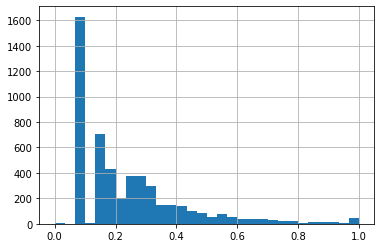

In [22]:
overlaid_gdf['adj_weight'].hist(bins=30)

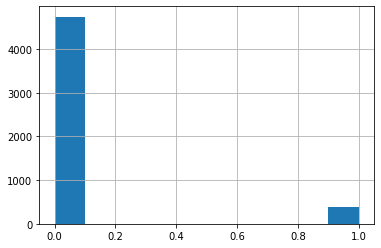

In [23]:
overlaid_gdf['truth_flag'].hist()
#overlaid_gdf.to_file('test.geojson', driver='GeoJSON')

In [24]:
final_gdf = overlaid_gdf.dropna(axis=0, subset=['truth_flag'])

In [25]:
final_gdf

,id_grid,sat_date,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,...,polar_weight,geo_weight_0,geo_weight_4,geo_weight_8,geo_weight_12,geo_weight_16,geo_weight_20,adj_weight,geometry,truth_flag
0,1272.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312,...,0.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176635,"POLYGON ((11383976.873 48804.526, 11385976.873...",0.0
1,1273.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312,...,0.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176635,"POLYGON ((11385976.873 48804.526, 11387976.873...",0.0
2,1274.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0600,...,0.0600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.244949,"POLYGON ((11461976.873 48804.526, 11463976.873...",0.0
3,1275.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0600,...,0.0600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.244949,"POLYGON ((11463976.873 48804.526, 11465976.873...",0.0
4,1279.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312,...,0.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176635,"POLYGON ((11383976.873 46804.526, 11385976.873...",0.0
5,1280.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312,...,0.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176635,"POLYGON ((11385976.873 46804.526, 11387976.873...",0.0
6,1283.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0512,...,0.0512,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.226274,"POLYGON ((11385976.873 44804.526, 11387976.873...",0.0
7,1308.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0712,...,0.0712,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.266833,"POLYGON ((12195976.873 30049.973, 12197976.873...",0.0
8,1324.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0662,...,0.0662,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.257294,"POLYGON ((11379976.873 26804.526, 11381976.873...",0.0
9,1325.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0662,...,0.0662,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.257294,"POLYGON ((11381976.873 26804.526, 11383976.873...",0.0


In [26]:
import numpy as np
alpha_list = np.linspace(0, 1.0, 11)
roc_df = pd.DataFrame({'alpha':alpha_list})
csi_df = pd.DataFrame({'alpha':alpha_list})
pod_df = pd.DataFrame({'alpha':alpha_list})
far_df = pd.DataFrame({'alpha':alpha_list})
sunglint_angle_list = np.arange(0, 24, 4)


In [27]:
for i in sunglint_angle_list:
    roc_df['roc_' + str(i)] = np.nan
    csi_df['csi_' + str(i)] = np.nan
    pod_df['pod_' + str(i)] = np.nan
    far_df['far_' + str(i)] = np.nan

In [28]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = final_gdf[final_gdf.truth_flag==0]
df_minority = final_gdf[final_gdf.truth_flag==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [48]:
y = df_downsampled['truth_flag'].values
param_list = []
for alpha in alpha_list:
    for sunglint_angle in sunglint_angle_list:
        logisticRegr = LogisticRegression(fit_intercept=True, penalty='none', solver='newton-cg')
        total_weight_downsampled = ((1 - alpha) * df_downsampled['geo_weight_' + str(sunglint_angle)]) + (alpha * df_downsampled['polar_weight'])
        total_weight_downsampled = total_weight_downsampled.values.astype(float)
        x = total_weight_downsampled.reshape(-1,1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)
        logisticRegr.fit(x_train, y_train)
        y_pred = logisticRegr.predict(x_test)
        y_proba_pred = logisticRegr.predict_proba(x_test)[:, 1]
        logit_roc_auc = roc_auc_score(y_test, y_proba_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba_pred)
        csi = 1/((1/(1-fpr)) + (1/tpr) - 1)
        param = {'csi': csi, 'tpr': tpr, 'fpr': fpr, 'proba': thresholds, 'alpha': alpha, 'sg_angle': sunglint_angle,
                 'roc': logit_roc_auc, 'model': logisticRegr, 'x': x_test, 'y': y_test}
        param_list.append(param)
        roc_df.loc[roc_df['alpha'] == alpha, 'roc_' + str(sunglint_angle)] = logit_roc_auc
        csi_df.loc[roc_df['alpha'] == alpha, 'csi_' + str(sunglint_angle)] = csi.max()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: Runtime

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [30]:
import pickle

filename = '../models/logit_reg_alpha_0.5_sg_angle_12.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [37]:
alpha = 0.5
sunglint_angle = 12
y = df_downsampled['truth_flag'].values
total_weight_downsampled = ((1 - alpha) * df_downsampled['geo_weight_' + str(sunglint_angle)]) + (alpha * df_downsampled['polar_weight'])
total_weight_downsampled = total_weight_downsampled.values.astype(float)
x = total_weight_downsampled.reshape(-1,1)
y_pred = loaded_model.predict_proba(x)[:, 1]

In [38]:
logit_roc_auc = roc_auc_score(y, y_pred)

In [41]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
csi = 1/((1/(1-fpr)) + (1/tpr) - 1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [47]:
len(thresholds)

786

(0.2, 1.0)

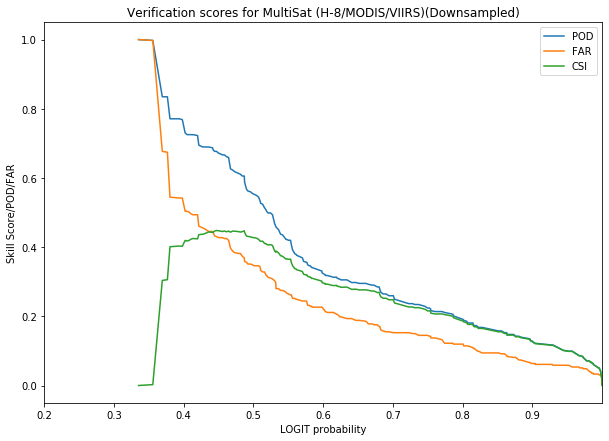

In [48]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

ax.plot(thresholds, tpr, label='POD');
ax.plot(thresholds, fpr, label='FAR');
ax.plot(thresholds, csi, label='CSI');
ax.legend()
ax.set_xlabel('LOGIT probability')
ax.set_ylabel('Skill Score/POD/FAR')
plt.xticks(np.arange(0, 1, step=0.1))
plt.title('Verification scores for MultiSat (H-8/MODIS/VIIRS)(Downsampled)')
plt.xlim(0.2, 1.0) 